In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from PIL import Image, ImageOps
import numpy

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
y_train[0]


5

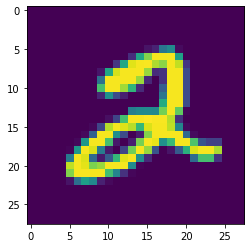

In [6]:
plt.imshow(X_train[5])

In [7]:
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')

In [8]:
number_of_classes = 10
Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

In [9]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [10]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(Flatten())
model.add(Dense(number_of_classes, activation="softmax"))

In [11]:
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=["accuracy"])

In [13]:
model.fit(X_train, Y_train, batch_size=32, epochs=2, validation_data=(X_test,Y_test))

Epoch 1/2
1875/1875 [==============================] - 192s 102ms/step - loss: 0.0748 - accuracy: 0.9777 - val_loss: 0.0860 - val_accuracy: 0.9741
Epoch 2/2
1875/1875 [==============================] - 200s 106ms/step - loss: 0.0514 - accuracy: 0.9841 - val_loss: 0.0798 - val_accuracy: 0.9779


In [14]:
metrics = model.evaluate(X_test, Y_test, verbose=0)
print("Metrics (Test Loss & Test Accuracy): ")
print(metrics)

Metrics (Test Loss & Test Accuracy): 
[0.07977673411369324, 0.9779000282287598]


In [15]:
prediction = model.predict(X_test[:4])
print(prediction)

1/1 [==============================] - 0s 92ms/step
[[1.9575515e-09 9.8025736e-16 8.9905996e-08 4.7312946e-07 1.2485041e-15
  2.4508694e-13 5.3672301e-16 9.9999940e-01 2.4991362e-10 2.4846424e-08]
 [1.6662373e-09 1.8424483e-08 9.9999821e-01 9.7982039e-13 3.3442663e-14
  4.6557129e-16 1.8329075e-06 2.4284145e-17 1.1023775e-08 1.0275125e-13]
 [1.2783455e-05 9.9572706e-01 5.5562251e-04 1.0932505e-07 1.4600494e-03
  1.1129031e-05 1.8144665e-06 2.7339609e-04 1.9541150e-03 3.9040092e-06]
 [9.9996328e-01 1.2637564e-11 5.4396382e-06 1.4225941e-10 1.0283924e-09
  1.0670891e-09 8.1993103e-06 3.2951794e-11 9.1234774e-08 2.3044116e-05]]


In [16]:
print(numpy.argmax(prediction, axis=1))
print(Y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [17]:
model.save("model.h5")

In [19]:
model=load_model("model.h5")